### Изучение рынка заведений общественного питания Москвы
- Автор: Станишевская Ю.Л.
- Дата: 19.12.24.

### Цели и задачи проекта

Анализ рынка заведений общественного питания Москвы, с целью открытия нового заведения.
Задачи: 
- определение наиболее выгодного типа заведения;
- анализ районов для нового заведения;
- анализ меню и цен для заведения;




### Описание данных

Файл ***/datasets/rest_info.csv*** содержит информацию о заведениях общественного питания:
- <font color='#007000'>***name*** — название заведения;
- <font color='#007000'>***address*** — адрес заведения;
- <font color='#007000'>***district*** — административный район, в котором находится заведение, например Центральный административный округ;
- <font color='#007000'>***category*** — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- <font color='#007000'>***hours*** — информация о днях и часах работы;
- <font color='#007000'>***rating*** — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- <font color='#007000'>***chain*** — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    * 0 — заведение не является сетевым;
    * 1 — заведение является сетевым.
- <font color='#007000'>***seats*** — количество посадочных мест.

    
Файл ***/datasets/rest_price.csv*** содержит информацию о среднем чеке в заведениях общественного питания:
- <font color='#007000'>***price*** — категория цен в заведении, например  «средние», «ниже среднего», «выше среднего» и так далее;
- <font color='#007000'>***avg_bill*** — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    * «Средний счёт: 1000–1500 ₽»;
    * «Цена чашки капучино: 130–220 ₽»;
    *«Цена бокала пива: 400–600 ₽».и так далее;
- <font color='#007000'>***middle_avg_bill*** — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- <font color='#007000'>***middle_coffee_cup*** — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.



### Содержимое проекта

* [1. Загрузка и знакомство с данными](#ch1)
    - [1.1. Промежуточный вывод:](#ch1.1)
    - [1.2. Подготовка единого датафрейма:](#ch1.2)
* [2. Проверка ошибок в данных и их предобработка](#ch2)
    - [2.1. Названия, или метки, столбцов датафрейма:](#ch2.1)
    - [2.2. Типы данных:](#ch2.2)
    - [2.3. Наличие пропусков в данных:](#ch2.3)
    - [2.4. Явные и неявные дубликаты в данных:](#ch2.4)
    - [2.5. Выделение новых столбцов:](#ch2.5)
    - [2.6. Промежуточный вывод:](#ch2.6)    
* [ 3. Исследовательский анализ данных](#ch3)
    - [3.1. Задача 1:](#ch3.1)
    - [3.2. Задача 2:](#ch3.2)
    - [3.3. Задача 3:](#ch3.3)
    - [3.4. Задача 4:](#ch3.4)
    - [3.5. Задача 5:](#ch3.5)
    - [3.6. Задача 6:](#ch3.6)
    - [3.7. Задача 7:](#ch3.7)
    - [3.8. Задача 8:](#ch3.8)
    - [3.9. Задача 9:](#ch3.9)
    - [3.10. Промежуточный вывод:](#ch3.10)

* [4. Детальное исследование пиццерий:](#ch4)
    - [4.1. Задача 1:](#ch4.1)
    - [4.2. Задача 2:](#ch4.2)
    - [4.3. Задача 3:](#ch4.3)
    - [4.4. Задача 4:](#ch4.4)
    - [4.5. Промежуточный вывод:](#ch4.5)
* [5. Итоговый вывод и рекомендации](#ch5)

<a class='anchor' id="ch1"></a>
##  Загрузка и знакомство с данными

- загрузите данные о заведениях общественного питания Москвы. Путь к файлам: /datasets/rest_info.csv и /datasets/rest_price.csv.
- Познакомьтесь с данными и изучите общую информацию о них.
- Сделайте вывод о полученных данных: каков объём данных, соответствуют ли данные описанию, встречаются ли пропущенные значения, используются ли верные типы данных.
- Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.
- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [2]:
!pip install phik
!pip install scipy

     |████████████████████████████████| 686 kB 1.5 MB/s eta 0:00:01


In [3]:

# Импортируем библиотеки
import pandas as pd
import numpy as np
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from scipy import stats
from phik import phik_matrix

In [4]:

try:
    df_info=pd.read_csv('C:/Desktop/yandex_pract/rest_info.csv')
    df_pr=pd.read_csv('C:/Desktop/yandex_pract/rest_price.csv')

except:
    df_info=pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
    df_pr=pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')
    



In [5]:
#вывод общей инвормации
display(df_info.info(),df_pr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   mi

None

None

В таблице rest_info отсутствует часть информации о часах работы некоторых заведений, а также о количестве посадочных мест. Остальная информация присутствует в полном объеме.

В таблице rest_price присутствует информация не обо всех заведениях, прдставленных в первой таблице (8406 строк против 4058). В целом, часть пропусков объяснимы тем, что одноименные рестораны расположенны на разных адресах. В каждой категории присутствуют пропуски.

In [6]:
#вывод 20 рандомных значений из датафреймов
display(df_info.sample(20),df_pr.sample(20))

,id,name,category,address,district,hours,rating,chain,seats
5388,072c641a26164126bc4397a194849fba,Lavash,кафе,"Москва, Салтыковская улица, 8Б",Восточный административный округ,"ежедневно, 11:00–23:00",4.4,0,NaN
6025,5c2f92887c4a487e986cca87be6d6898,Wave california poke,ресторан,"Москва, улица Вавилова, 64/1с1",Юго-Западный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.6,0,NaN
5517,33ac5f4ddcf44958866beaa909c86dce,Чайхана Семетей,булочная,"Москва, Зелёный проспект, 8Б",Восточный административный округ,"ежедневно, круглосуточно",3.4,0,0.0
2670,5cafcc8541d04e688a6de7ce193d6f79,Модель Пинкмана,"бар,паб","Москва, Измайловское шоссе, 73Ж, стр. 9",Восточный административный округ,вт-вс 14:00–22:00,4.6,0,NaN
2298,1c2b9d22bae742e6a74f8c4b0e2e2108,Чаме-Чаме,кафе,"Москва, улица Бочкова, 6, корп. 2, стр. 2",Северо-Восточный административный округ,"ежедневно, 11:00–22:50",4.4,1,NaN
5192,cb867f6d6c204225be8bdcc12b2ae5e4,Flip,кофейня,"Москва, Большая Татарская улица, 7к4",Центральный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.3,1,NaN
6422,64df01343e01465086106fd9e515892e,Магазин фастфудной продукции,кофейня,"Москва, улица Юных Ленинцев, 43/33с2",Юго-Восточный административный округ,"ежедневно, 09:00–00:00",3.9,0,NaN
2376,ce9519bb3e424c079c1f9647e88cfc97,Хочу шаурму,быстрое питание,"Москва, Колодезный переулок, 3, стр. 26",Восточный административный округ,"ежедневно, круглосуточно",4.3,0,NaN
2065,ac7008d50c3a40db9a262adb33efc2a7,Я самурай!,кафе,"Москва, улица Академика Королёва, 28, корп. 1",Северо-Восточный административный округ,"ежедневно, 11:00–23:00",4.1,0,350.0
300,f6623b42d3e243edba11e135e9b024e9,Ресторан Стейк'S,ресторан,"Москва, Ленинградское шоссе, 80, стр. 1",Северный административный округ,"ежедневно, 12:00–23:00",4.6,0,84.0


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
1558,3d06e1cb047c43f1be514a307e4357d2,средние,NaN,NaN,NaN
2705,d4dadbde098e486185e6f552857efa32,выше среднего,NaN,NaN,NaN
731,cd0181b651df4ea982169130a291a1b7,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
3719,7a9fe4e9ee3e42e9af405c2b47e590d7,средние,Цена чашки капучино:60–180 ₽,NaN,120.0
2517,00dc91ede89348a7ad241e9bdc4612a6,высокие,Средний счёт:2000–3000 ₽,2500.0,NaN
1316,67a4b45c47a34f7aaf96dbb6d313399a,средние,Средний счёт:400–1000 ₽,700.0,NaN
3464,4e79847ba3bd4036a384c2dd99b46b56,средние,Средний счёт:450 ₽,450.0,NaN
555,221c83972a7f47d1970e61614eeaade4,выше среднего,Средний счёт:2000 ₽,2000.0,NaN
1726,c0df760e0cac4c0f9901189a2bce4475,высокие,Средний счёт:2300 ₽,2300.0,NaN
3639,dead0dc31d8f45539a225891d9b2cf58,средние,Средний счёт:от 400 ₽,400.0,NaN


Необходимо привести к единому виду названия ресторанов.
Возможно, стоит привести столбец часов работы в наиболее удобный формат: например, отдельный столбец для будних дней, сб и вс.


In [7]:
display(df_info['name'].nunique(),df_info['id'].nunique(),df_pr['id'].nunique(),df_info['category'].unique(),df_info['district'].unique(),
        df_info['chain'].unique(), 
        df_info['seats'].unique(),
        df_info['rating'].unique())

5614

8406

4058

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

array([0, 1])

array([      nan, 4.000e+00, 4.500e+01, 1.480e+02, 7.900e+01, 6.500e+01,
       1.020e+02, 1.800e+02, 9.600e+01, 2.500e+01, 4.600e+01, 4.000e+01,
       2.470e+02, 2.100e+01, 8.000e+00, 3.500e+01, 2.400e+02, 8.500e+01,
       1.200e+01, 6.000e+01, 1.200e+02, 1.600e+01, 8.000e+01, 5.000e+01,
       4.400e+01, 4.300e+01, 9.000e+01, 0.000e+00, 1.980e+02, 9.500e+01,
       3.500e+02, 1.240e+02, 1.000e+01, 7.000e+01, 4.800e+01, 6.000e+00,
       9.800e+01, 3.000e+01, 5.200e+01, 2.000e+01, 2.000e+00, 1.800e+01,
       2.200e+01, 1.500e+01, 2.800e+01, 3.000e+02, 7.500e+01, 3.200e+01,
       1.000e+02, 1.100e+02, 2.300e+02, 2.500e+02, 1.300e+02, 8.400e+01,
       3.980e+02, 2.700e+01, 2.860e+02, 1.450e+02, 3.600e+01, 9.700e+01,
       2.260e+02, 1.400e+02, 1.660e+02, 2.020e+02, 9.400e+01, 1.890e+02,
       5.300e+01, 1.040e+02, 7.200e+01, 1.310e+02, 1.050e+02, 5.500e+01,
       1.700e+01, 1.000e+00, 1.150e+02, 3.100e+02, 7.700e+01, 1.600e+02,
       3.200e+02, 3.400e+01, 1.500e+02, 2.000e+02, 

array([5. , 4.5, 4.6, 4.4, 4.7, 4.8, 4.3, 4.9, 4.2, 4.1, 4. , 3.8, 3.9,
       3.7, 3.6, 2.8, 2.7, 3.1, 1.5, 2. , 1.4, 3.3, 3.5, 3.2, 2.9, 3. ,
       3.4, 2.3, 2.2, 2.5, 2.6, 1.7, 1. , 1.1, 2.4, 1.3, 1.2, 2.1, 1.8,
       1.9, 1.6])

Со всеми данными кроме столбца seats значения хорошие, без дублей. а вот столбец с количеством мест - странный, его необходимо преобразовать в целочисленный тип.

Значиельное превышение строк в первой таблице относительно второй (с ценами), объясняется тем, что некоторые заведения - сетевые и, следовательно, имеют одно и то же название но разный адрес. Встает вопрос о корректности объединения данных двух таблиц,т.к. уникальные код разный для каждого сетевого заведения, но зачастую, в одном регионе, сетевые заведения не отличаются в ценовых диапазонах. Поэтому, скорее всего, корректно провести full join таблиц, с дублированием средних цен для сетевых заведений, если для них отсутствует данная информация.
- Количество уникальных названий ресторанов: 5614
- Количество уникальных ид в таблице rest_info: 8406
- Количество уникальных ид в таблице rest_price: 4058



<a class='anchor' id="ch1.1"></a>
### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

В таблице rest_info отсутствует часть информации о часах работы некоторых заведений, а также о количестве посадочных мест. Остальная информация присутствует в полном объеме.

В таблице rest_price присутствует информация не обо всех заведениях, прдставленных в первой таблице (8406 строк против 4058). В целом, часть пропусков объяснимы тем, что одноименные рестораны расположенны на разных адресах. В каждой категории присутствуют пропуски.

Необходимо привести к единому виду названия ресторанов.
Возможно, стоит привести столбец часов работы в наиболее удобный формат: например, отдельный столбец для будних дней, сб и вс.

Со всеми данными кроме столбца seats значения хорошие, без дублей. а вот столбец с количеством мест - странный, его необходимо преобразовать в целочисленный тип.

Значиельное превышение строк в первой таблице относительно второй (с ценами), объясняется тем, что некоторые заведения - сетевые и, следовательно, имеют одно и то же название но разный адрес. Встает вопрос о корректности объединения данных двух таблиц,т.к. уникальные код разный для каждого сетевого заведения, но зачастую, в одном регионе, сетевые заведения не отличаются в ценовых диапазонах. Поэтому, скорее всего, корректно провести full join таблиц, с дублированием средних цен для сетевых заведений, если для них отсутствует данная информация.
- Количество уникальных названий ресторанов: 5614
- Количество уникальных ид в таблице rest_info: 8406
- Количество уникальных ид в таблице rest_price: 4058



<a class='anchor' id="ch1.2"></a>
### Подготовка единого датафрейма: 

In [8]:
df=df_info.merge(df_pr,on='id',how='outer')

In [9]:
display(df.sample(5))

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
7980,bc4e388dec094056addf94f2e5b6f23a,Яндекс Лавка,ресторан,"Москва, улица Маршала Захарова, 2",Южный административный округ,"ежедневно, 07:00–00:00",4.0,1,200.0,NaN,NaN,NaN,NaN
4706,2e184dcb68014d10b47a4e78e293db92,Му-Му,ресторан,"Москва, Пушечная улица, 7/5с2",Центральный административный округ,"пн-пт 08:00–22:00; сб,вс 10:00–22:00",4.3,1,NaN,средние,Средний счёт:360 ₽,360.0,NaN
2984,4bd129d345a44d508bfe7f51d0ed8024,Натюр Фритюр,кафе,"Москва, Хабаровская улица, 15",Восточный административный округ,NaN,4.8,0,75.0,NaN,NaN,NaN,NaN
5413,cc119188f053473b9ced0c1485c50b76,Поминальная трапеза,кафе,"Москва, Суздальская улица, вл12Д",Восточный административный округ,"ежедневно, 10:00–23:00",4.8,1,NaN,NaN,NaN,NaN,NaN
8220,63349daa46644d088732d6571b3dab6f,Шеф Гирос,быстрое питание,"Москва, проспект Андропова, 22",Южный административный округ,"ежедневно, 09:00–22:00",4.2,0,300.0,NaN,Средний счёт:250–350 ₽,300.0,NaN


Все-таки, если и разбивать часы работы заведений, для детального анализа, то разбивать их стоит по дням недели. т.к. некоторые заведения работают "нестандартно". 

In [10]:
df.shape[0]

8406

---
<a class='anchor' id="ch2"></a>
##  Проверка ошибок в данных и их предобработка


Подготовьте данные к исследовательскому анализу: 

<a class='anchor' id="ch2.1"></a>
### Названия, или метки, столбцов датафрейма: 


In [11]:
df['name'] = [x.replace(' ', '_').lower() for x in df['name']]
df['name'] = [x.replace('.', '_') for x in df['name']]
df_0=df[df['chain']==0]
print(df_0[['name']].value_counts().head(40))



name                  
кафе                      189
шаурма                     43
ресторан                   34
столовая                   28
кофейня                    12
бистро                     12
кафе-столовая               9
буфет                       8
трапезная                   7
шашлычная                   6
поминальные_обеды           5
блины                       3
пиццерия                    3
шашлык_на_углях             2
istanbul_kebab              2
центр_плова                 2
pasta_cup_&_pizza           2
на_углях                    2
di_villaggio                2
bb_grill                    2
il_pizzaiolo                2
чайхона_ош_сити             2
бишкек_сити                 2
кафе_шашлык                 2
вкусвилл,_кафе              2
папан                       2
важная_персона              2
семейная_пекарня            2
ku:_рамен_изакая_бар        2
токио_рамен                 2
кафе-кулинария              2
хочу_хычин                  2
vabene           

Примечательно, что в данных часто встречаются несетевые заведения с одинаковым названием. Лидер - "Кафе". Также выявлена возможная ошибка в данных:
- название содержит в себе тип заведения (вкусвилл)


In [12]:
tmp=df[df['name'] =='вкусвилл,_кафе']    #проверка пустых значений на закономерности           
display(tmp)  

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
5077,410821c6ca3040a098504bac93b93d8d,"вкусвилл,_кафе",кофейня,"Москва, Волгоградский проспект, 3-5с2",Центральный административный округ,"ежедневно, 08:00–22:00",4.2,0,NaN,NaN,NaN,NaN,NaN
7042,b209629973784660b32ad2a265389d53,"вкусвилл,_кафе",кафе,"Москва, Новочерёмушкинская улица, 66к1",Юго-Западный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",3.5,0,NaN,NaN,NaN,NaN,NaN


Не совсем понятно, что делать, т.к. у одного заведения две категории. 

<a class='anchor' id="ch2.2"></a>
###  Типы данных: 

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [13]:
df['seats'] = df['seats'].apply(np.floor) #округляем в меньшую сторону, если есть дробные числа. 

In [14]:
# Оптимизация числовых типов данных
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:


    '''
    Function optimizes memory usage in dataframe
    df: pd.DataFrame - data table
    print_size: bool - display of optimization results
    return pd.DataFrame - amount of optimized memory
    '''


    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df
##P.S. этот код мне прошлый ревьюер подсказал. Не мое изобретение.
optimize_memory_usage(df,False)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре_комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse_coffee_shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль_марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши_мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана_sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 730.6+ KB
None


<a class='anchor' id="ch2.3"></a>
###  Наличие пропусков в данных: 

Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [16]:
tmp=df[df['chain'] ==1]    #проверка пустых значений на закономерности           
display(tmp.sort_values(by='name').head(20))


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
7466,45e2e7bff6184d7191493867674ee5e7,1-я_креветочная,кафе,"Москва, Мячковский бульвар, 3А",Юго-Восточный административный округ,"пн-чт 10:00–21:00; пт,сб 10:00–22:00; вс 10:00...",3.7,1,0.0,NaN,NaN,NaN,NaN
7590,142045f5c4ba43508ba2893bb8fc1dbd,10_идеальных_пицц,ресторан,"Москва, улица Паустовского, 6, корп. 1",Юго-Западный административный округ,"ежедневно, 11:45–22:30",4.3,1,150.0,NaN,NaN,NaN,NaN
5069,f44f7e48e5d6423fb432a88549f3040c,10_идеальных_пицц,ресторан,"Москва, улица Большие Каменщики, 9сЕ",Центральный административный округ,"ежедневно, 11:45–22:30",4.3,1,NaN,NaN,NaN,NaN,NaN
430,56eaa8b3b94d45ad92e205890c308a50,10_идеальных_пицц,ресторан,"Москва, улица Свободы, 48, стр. 1",Северо-Западный административный округ,"ежедневно, круглосуточно",4.3,1,110.0,NaN,NaN,NaN,NaN
2267,179f54ce9ea44107883477085689eb1c,18_грамм,кофейня,"Москва, Погонный проезд, 3А, корп. 5",Восточный административный округ,"ежедневно, 08:00–22:00",4.4,1,252.0,средние,Цена чашки капучино:100–200 ₽,NaN,150.0
3282,0988990ab765491e8d376123bdc904ac,18_грамм,кофейня,"Москва, Шелепихинская набережная, 34, корп. 2",Северо-Западный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",4.6,1,NaN,NaN,NaN,NaN,NaN
4723,29fb5c767998463b8fad40f0ac7ee6fa,18_грамм,кофейня,"Москва, набережная Академика Туполева, 15Б",Центральный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",4.4,1,NaN,средние,Цена чашки капучино:100–200 ₽,NaN,150.0
7009,3ec7f257cc0f47d395a87382c1b0864c,4_сезона,кафе,"Москва, улица Академика Пилюгина, 8А",Юго-Западный административный округ,"ежедневно, 09:00–23:00",4.7,1,NaN,NaN,NaN,NaN,NaN
4632,f5807dba52504be89046abecb44e03eb,7_сэндвичей,кофейня,"Москва, 4-й Сыромятнический переулок, 3/5с3",Центральный административный округ,"ежедневно, 09:00–19:00",4.2,1,NaN,средние,Средний счёт:160–500 ₽,330.0,NaN
3899,23ad2fd4b0a5494fb1dda67e84c977b6,7_сэндвичей,кофейня,"Москва, Большой Саввинский переулок, 2, корп. 1",Центральный административный округ,"пн-пт 08:00–20:00; сб,вс 09:00–19:00",4.2,1,50.0,средние,Средний счёт:от 300 ₽,300.0,NaN


Все-таки прайс, видимо, у сети разный. Дублировать цены нельзя. Если только категории цен (столбец price).

In [17]:
display(df.info())
df.loc[df['chain']==1,'price']=df.groupby(['name','chain'])['price'].transform(lambda x: x.fillna(x.mode() [0] if not x.mode().empty else np.nan))
#display(df.sort_values(by='name').head(20))
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 730.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              4420 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 988.6+ KB


None

Заполнили более тысячи пропусков в столбце price.

<a class='anchor' id="ch2.4"></a>
###  Явные и неявные дубликаты в данных: 

Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [18]:
#Проверка явных дубликатов
unique=df[df.duplicated(keep='last')]
display(unique)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


Явные дубликаты отсутствуют

In [19]:
#Проверка неявных дубликатов
unique=df[df[['name','address']].duplicated(keep=False)]
display(unique)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more_poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more_poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня_клешни_и_хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня_клешни_и_хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,средние,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб_да_выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб_да_выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


Первоначально хочется удалить первые вхождения, т.к. нет никакой иной пометки о создании записи и о актуальности. Но с этой мысли сбил график заведения "хлеб да выпечка" т.к. второе вхождение не имеет данных о работе кафе. Также, возникла мысль, что заведение может разделятся на несколько локаций в одном заведеии, где одна часть относится к кафе и работает в одном режиме, а вторая - булочная, работающая в другом (например, как было в макдональдсе с кафе и рестораном). и при таком подходе однозначным дубликатом является лишь "more poke", и, видимо, удалению подлежит 1430 строчка в датафрейме, т.к. строка 1511 уже отмечена как сеть ресторанов. Кстати, если отталкиваться от этой логики, то удалению можно подвергнуть представленные выше данные с не являющиеся сетевыми (как критерий более раннего вхождения в базу данных).

In [20]:
#Удаление строк с неявными дубликатами
df=df.loc[df['id']!='62608690e9cc464fbcd980cfd552e334']
df=df.loc[df['id']!='c6ef39ae8a8c483d8f9a6531bc386a2c']
df=df.loc[df['id']!='d3116844e4e048f99614eb30be3214e0']


<a class='anchor' id="ch2.5"></a>
###  Выделение новых столбцов: 
- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [21]:
df['is_24_7']=df['hours'].str.contains(''.join('круглосуточно')) #фильтр 
display(df) 

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре_комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse_coffee_shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль_марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши_мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана_sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,средние,NaN,NaN,NaN,True


<a class='anchor' id="ch2.6"></a>

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Все названия заведений были приведены к единому стилю с нижним прочерком между словами. Количество посадочных мест было округлено в меньшую сторону, т.к. двух с половиной дровосеков не существует.

Заполнены пропуски в ценовой категории сетевых заведений. Удалено три дубликата. А также создан столбец фильтр на определение является ли заведение круглосуточным или нет.

---
<a class='anchor' id="ch3"></a>
##  Исследовательский анализ данных

Проведите исследовательский анализ исходных данных и ответьте на вопросы:

При исследовании данных используйте визуализации. Проверьте, что для каждого случая был подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

<a class='anchor' id="ch3.1"></a>

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

,count
,id
category,
"бар,паб",765
булочная,256
быстрое питание,603
кафе,2377
кофейня,1413
пиццерия,633
ресторан,2041
столовая,315


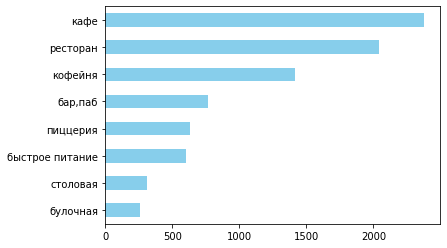

In [22]:
pivot_cat=df.pivot_table(values='id',index=['category'],aggfunc=['count'])
df['category'].value_counts().sort_values().plot(kind='barh',
                                color='skyblue',
                                legend=False)

display(pivot_cat)

Наибольшее количество заведений относится к категории кафе (2377), на втором месте - ресторан (2041), на третьем - кофейня (1413).
Остальных заведений значительно меньше:
- бар,паб - 765
- пиццерия - 633
- быстрое питание - 603
Заведения наименее распространенные в Москве:
- столовая - 315
- булочная - 256

Пы.Сы. пока писала рейтинг, задумалась: насколько корректно булочную отделять в отдельную категорию? будто-бы булочная с посадочными местами - это кафе/кофейня, а без посаочных мест не заведение быстрого питания, а обыкновенный продуктовый магазин. 



In [23]:
pivot_price=df.pivot_table(values='id',index=['price'],aggfunc=['count'])
display(pivot_price)

,count
,id
price,
высокие,512
выше среднего,666
низкие,329
средние,2913


В основном преобладают заведения со средним чеком (2913)

Следом идут заведением с чеком выше среднего (666)

Тройку лидеров с небольшим отрывом от второго места завершают заведения с высоким прайсом (512)

Лишь незначительную часть составляют заведения с низкими ценами (329)


<a class='anchor' id="ch3.2"></a>

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [24]:
pivot_district=df.pivot_table(values='id',index=['district'],aggfunc=['count'])
display((pivot_district,pivot_district/len(df)*100))

(                                        count
                                            id
 district                                     
 Восточный административный округ          798
 Западный административный округ           850
 Северный административный округ           899
 Северо-Восточный административный округ   890
 Северо-Западный административный округ    409
 Центральный административный округ       2242
 Юго-Восточный административный округ      714
 Юго-Западный административный округ       709
 Южный административный округ              892,
                                              count
                                                 id
 district                                          
 Восточный административный округ          9.496608
 Западный административный округ          10.115435
 Северный административный округ          10.698560
 Северо-Восточный административный округ  10.591455
 Северо-Западный административный округ    4.867309
 Центральный админи

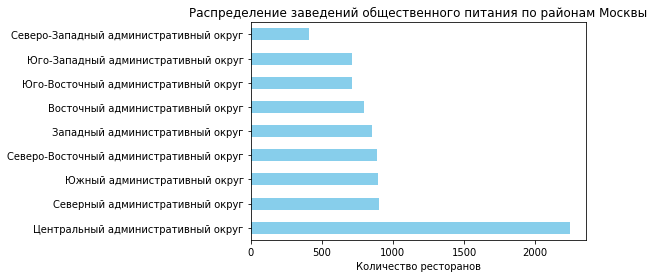

In [25]:
#Строим визуализацию (линейчатая диаграмма)
df['district'].value_counts().plot(kind='barh',
                                color='skyblue',
                                legend=False)

# Настраиваем график с помощью библиотеки matplotlib
plt.title('Распределение заведений общественного питания по районам Москвы')
plt.xlabel('Количество ресторанов')

plt.show()

In [26]:
df_CAO=df[df['district']=='Центральный административный округ']

In [27]:
price=df_CAO.groupby('price')['id'].count()

display(price.sort_values(), (price/sum(price)*100).sort_values()) 

price_district=df.pivot_table(values='id',index=['district','price'],aggfunc=['count'])
display(pivot_district)



price
низкие            88
высокие          282
выше среднего    282
средние          845
Name: id, dtype: int64

price
низкие            5.878424
высокие          18.837675
выше среднего    18.837675
средние          56.446226
Name: id, dtype: float64

,count
,id
district,
Восточный административный округ,798
Западный административный округ,850
Северный административный округ,899
Северо-Восточный административный округ,890
Северо-Западный административный округ,409
Центральный административный округ,2242
Юго-Восточный административный округ,714
Юго-Западный административный округ,709


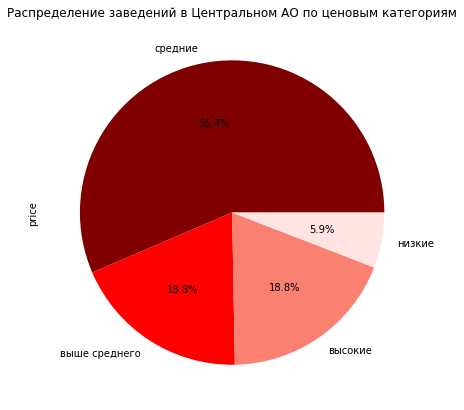

In [28]:
#Строим визуализацию (Круговая диаграмма)
df_CAO['price'].value_counts().plot(kind='pie',
                                legend=False,figsize=(10, 7),
                                    colors = ('maroon', "red", 'salmon', "mistyrose"),
                                   autopct='%1.1f%%',title='Распределение заведений в Центральном АО по ценовым категориям')

# Настраиваем график с помощью библиотеки matplotlib

plt.show()

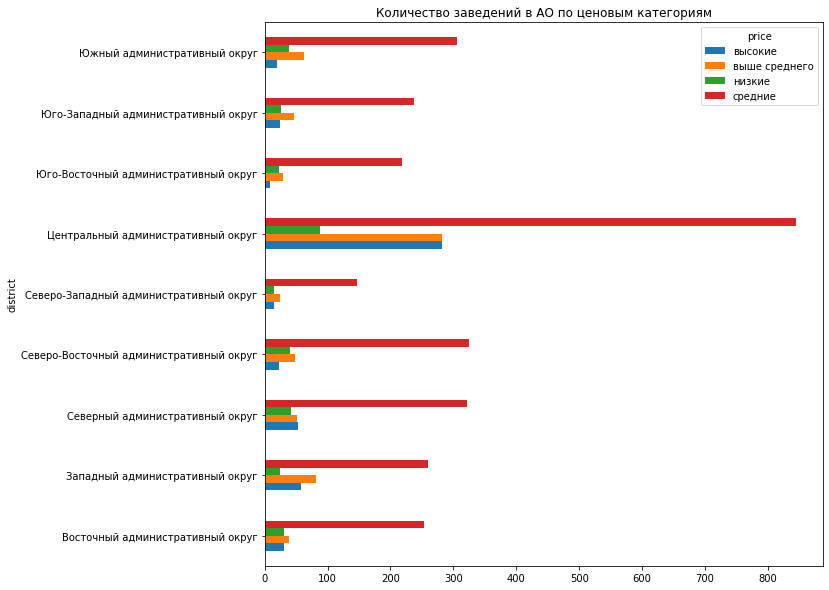

In [29]:
df.groupby(['district','price'])['id'].count().unstack(fill_value=0).plot(kind='barh',legend=True,figsize=(10, 10),
                                                                          title='Количество заведений в АО по ценовым категориям')

# Настраиваем график с помощью библиотеки matplotlib

plt.show()

В основном в ЦАО заведения устанавливают средний прайс (56.45% от всех данных), суть реже - высокий (18.84%) или выше среднего(18.84%). Очень редко у заведений низкий прайс (5.88%).
В остальных регионах картина скромнее - относительно высокое количество заведений с высоким прайсом встречается лишь в Западном и Северном АО.
В целом, мне кажется, что ценовая политика заведения во многом зависит от стоимости аренды помещения, поэтому распределение цен по районам достаточно объяснимы. Плюс в районах с высокой концентрацией заведений, необходимо выделяться на фоне остальных - это тоже вносит свой вклад в итоговый прайс.

In [61]:
pd.set_option('display.max_rows', 100) 
pivot_cat=df.pivot_table(values='id',index=['district','category'],aggfunc=['count'])

display(pivot_cat)


count
                                                           id
district                                category             
Восточный административный округ        бар,паб            53
                                        булочная           25
                                        быстрое питание    71
                                        кафе              272
                                        кофейня           105
                                        пиццерия           72
                                        ресторан          160
                                        столовая           40
Западный административный округ         бар,паб            50
                                        булочная           37
                                        быстрое питание    62
                                        кафе              238
                                        кофейня           150
                                        пиццерия           71
                                        ресторан          218
                                        столовая           24
Северный административный округ         бар,паб            68
                                        булочная           39
                                        быстрое питание    58
                                        кафе              235
                                        кофейня           193
                                        пиццерия           77
                                        ресторан          188
                                        столовая           41
Северо-Восточный административный округ бар,паб            63
                                        булочная           28
                                        быстрое питание    82
                                        кафе              269
                                        кофейня           159
                                        пиццерия           68
                                        ресторан          181
                                        столовая           40
Северо-Западный административный округ  бар,паб            23
                                        булочная           12
                                        быстрое питание    30
                                        кафе              115
                                        кофейня            62
                                        пиццерия           40
                                        ресторан          109
                                        столовая           18
Центральный административный округ      бар,паб           364
                                        булочная           50
                                        быстрое питание    87
                                        кафе              464
                                        кофейня           428
                                        пиццерия          113
                                        ресторан          670
                                        столовая           66
Юго-Восточный административный округ    бар,паб            38
                                        булочная           13
                                        быстрое питание    67
                                        кафе              282
                                        кофейня            89
                                        пиццерия           55
                                        ресторан          145
                                        столовая           25
Юго-Западный административный округ     бар,паб            38
                                        булочная           27
                                        быстрое питание    61
                                        кафе              238
                                        кофейня            96
                                        пиццерия           64
                          

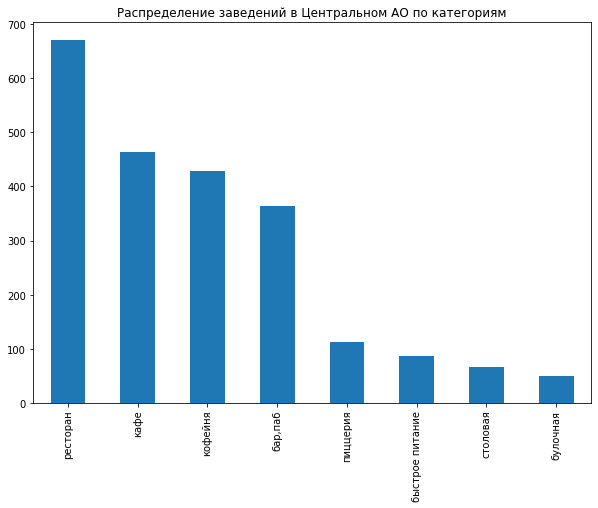

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

In [31]:
#Строим визуализацию (Круговая диаграмма)
df_CAO['category'].value_counts().plot(kind='bar',
                                legend=False,figsize=(10, 7),title='Распределение заведений в Центральном АО по категориям')

# Настраиваем график с помощью библиотеки matplotlib

plt.show()
df_CAO['category'].value_counts()

Если рассматривать заведения в разрезе ЦАО, то видно, что наиболее распространенными являются рестораны (670), на втором месте: кафе (464), кофейня (428) и бар,паб (364). Наименее распространенные заведения: пиццерия (113),быстрое питание (87),столовая (66), булочная (50).
Возможно, это связано с тем, что центр - является местом, где посетители хотят встретиться с друзьями и затратить несколько больше времени на трапезу и насладится красивыми видами, нежели это обычно делается в заведениях типа пиццерии, быстрого питания, столовой или булочной. Такие заведения, будто больше подходят под спальные или промышленные районы, чтобы чем то по-быстрому закинуться или купить что-то домой.

<a class='anchor' id="ch3.3"></a>

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

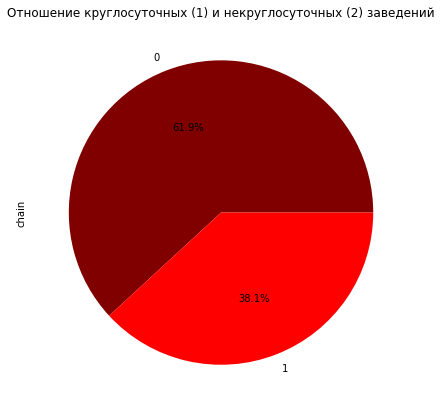

,count
,id
chain,
0,5198
1,3205


In [32]:

df['chain'].value_counts().plot(kind='pie',
                                legend=False,figsize=(10, 7),
                                    colors = ('maroon', "red", 'salmon', "mistyrose"),
                                   autopct='%1.1f%%',title='Отношение круглосуточных (1) и некруглосуточных (2) заведений')

# Настраиваем график с помощью библиотеки matplotlib

plt.show()
pivot_chain=df.pivot_table(values='id',index=['chain'],aggfunc=['count'])
display(pivot_chain)

В целом, сетевых заведений достаточно много (38.1% от общего количества заведений).

In [33]:
df[df['chain']==1].groupby(['name'])['id'].count()

name
1-я_креветочная       1
10_идеальных_пицц     3
18_грамм              3
4_сезона              1
7_сэндвичей           4
                     ..
ян_примус             3
яндекс_лавка         72
японская_кухня        4
ё-ланч                2
ёрш                   2
Name: id, Length: 746, dtype: int64

Обнаружила еще один дубль в виде "яндекс_лавка" и "яндекс.лавка". Исправила в самом начале.

Также выяснилось что некоторые сетевые заведения в Москве единичные. Всего в столице встречается 746 сетевых заведения.

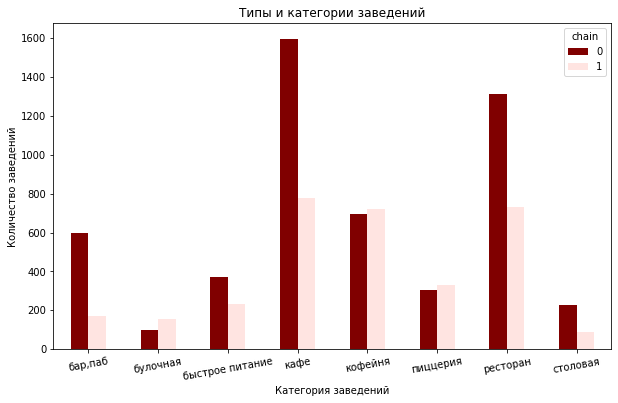

count
                         id
category        chain      
бар,паб         0       596
                1       169
булочная        0        99
                1       157
быстрое питание 0       371
                1       232
кафе            0      1598
                1       779
кофейня         0       693
                1       720
пиццерия        0       303
                1       330
ресторан        0      1311
                1       730
столовая        0       227
                1        88

In [34]:
# Группируем данные
df_group = df.groupby(['category','chain'])['id'].count().unstack(fill_value=0)
# Строим столбчатую диаграмму

ax=df_group.plot(kind='bar',
                title='Типы и категории заведений',
                xlabel='Категория заведений',
                ylabel='Количество заведений',
                rot=10,
                figsize=(10, 6),
               color = ('maroon', "mistyrose"))

# Отображаем график
plt.show()

pivot_category_chain=df.pivot_table(values='id',index=['category','chain'],aggfunc=['count'])
display(pivot_category_chain)

Хотелось бы также узнать как сделать подписи на графиках сразу, чтобы постоянно не выводить таблицы, с круговыми диаграммами все просто, а со столбчатыми не разобралась.

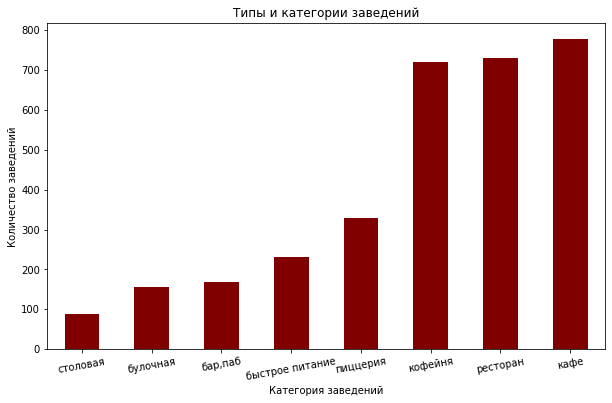

количество сетевых заведений по категориям


category
столовая            88
булочная           157
бар,паб            169
быстрое питание    232
пиццерия           330
кофейня            720
ресторан           730
кафе               779
Name: id, dtype: int64


Процент сетевых заведений по категориям от всех сетевых заведений


category
столовая            2.745710
булочная            4.898596
бар,паб             5.273011
быстрое питание     7.238690
пиццерия           10.296412
кофейня            22.464899
ресторан           22.776911
кафе               24.305772
Name: id, dtype: float64


Процент сетевых заведений по категориям от всех заведений


category
столовая           1.047245
булочная           1.868380
бар,паб            2.011186
быстрое питание    2.760919
пиццерия           3.927169
кофейня            8.568368
ресторан           8.687374
кафе               9.270499
Name: id, dtype: float64


Процент сетевых заведений по категориям от всех заведений этой категории


category
бар,паб            22.091503
столовая           27.936508
кафе               32.772402
ресторан           35.766781
быстрое питание    38.474295
кофейня            50.955414
пиццерия           52.132701
булочная           61.328125
Name: id, dtype: float64

In [35]:
# Группируем данные
df_group_1 = df[df['chain']==1].groupby('category')['id'].count()
df_group_all = df.groupby('category')['id'].count()
# Строим столбчатую диаграмму

df_group_1.sort_values().plot(kind='bar',
                title='Типы и категории заведений',
                xlabel='Категория заведений',
                ylabel='Количество заведений',
                rot=10,
                figsize=(10, 6),
               color = ('maroon'))

# Отображаем график
plt.show()

print('количество сетевых заведений по категориям')
display(df_group_1.sort_values())
print('')
print('Процент сетевых заведений по категориям от всех сетевых заведений')
display( (df_group_1/len(df[df['chain']==1] )*100).sort_values())
print('')
print('Процент сетевых заведений по категориям от всех заведений')
display( (df_group_1/len(df['chain'] )*100).sort_values())
print('')
print('Процент сетевых заведений по категориям от всех заведений этой категории')
display(((df_group_1/df_group_all )*100).sort_values())

Чаще всего сетевыми являются кафе (779), но всего 33% от всех кафе сетевые.
Далее идут ресторан (730) и кофейня (720), если рассматривать в разрезе категорий, то 36% ресторанов и 51% кофеен - сетевые.
Интересно, что наибольший процент сетевых заведений (61%) приходится на булочные, или 157 сетевых заведений. Похожая картина наблюдается с пиццериями (52%) или 330 сетевых заведений.

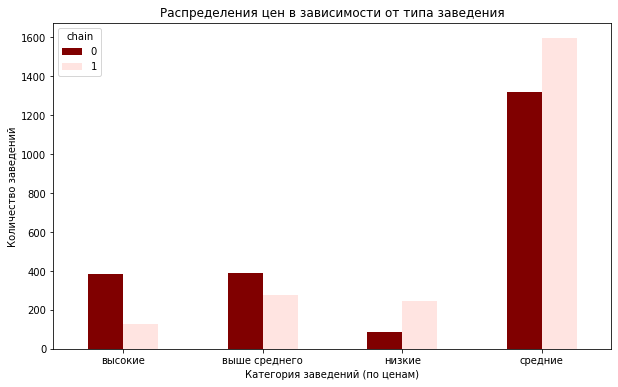

count
                       id
chain price              
0     высокие         386
      выше среднего   391
      низкие           84
      средние        1317
1     высокие         126
      выше среднего   275
      низкие          245
      средние        1596

In [36]:
# Группируем данные
df_grouped = df.groupby(['price','chain'])['id'].count().unstack(fill_value=0)
# Строим столбчатую диаграмму

ax=df_grouped.plot(kind='bar',
                title='Распределения цен в зависимости от типа заведения',
                xlabel='Категория заведений (по ценам)',
                ylabel='Количество заведений',
                rot=0,
                figsize=(10, 6),
               color = ('maroon', "mistyrose"))

# Отображаем график
plt.show()

pivot_chain_price=df.pivot_table(values='id',index=['chain','price'],aggfunc=['count'])
display(pivot_chain_price)

В основном, преобладают несетевые заведения (5198 против 3205).

Вне зависимости от того сетевое заведение или нет, преобладают заведения со средним прайсом. 
Практически одинаковое количество заведений с высоким прайсом и прайсом выше среднего в категории несетевых заведений. В сетевых все же преобладают заведения с прайсом "выше среднего", эта категория практически в два раза больше по количеству заведений с высоким прайсом. В несетевых  заведениях прайс "выше среднего" и "высокий" встречается практически с одинаковой частотой.
Значительное различие наблюдается в заведениях с низким прайсом - зачастую это сетевые заведения.

<a class='anchor' id="ch3.4"></a>

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


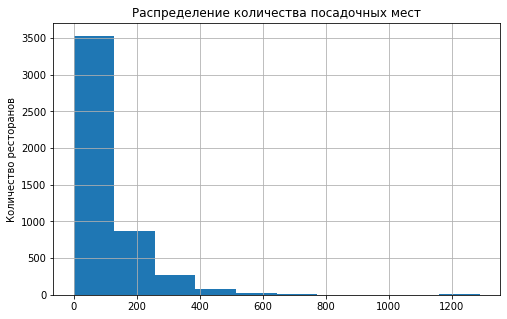

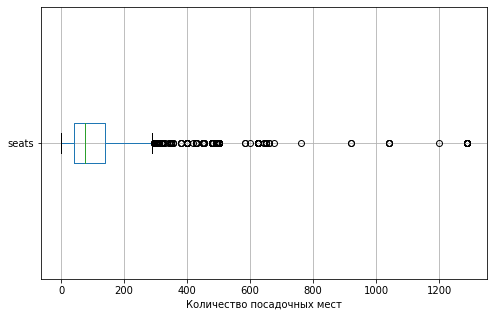

In [37]:
#Строим гистограмму, для выявления выбросов
df['seats'].hist(figsize=(8, 5))
plt.title('Распределение количества посадочных мест') # Заголовок диаграммы
plt.ylabel('Количество ресторанов') # Подписываем ось Y

plt.show()
#Строим диаграмму размаха, для выявления выбросов
boxplot = df.boxplot(column='seats',
                     vert=False, 
                     figsize=(8, 5),grid=True)

# Добавляем метку оси X

boxplot.set_xlabel('Количество посадочных мест')

plt.show()


In [38]:
df['seats'].describe() 

count    4792.000000
mean      108.361435
std       122.841133
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Основной разброс посадочных мест приходится на значения от 40 до 140. Медианной значение - 75 мест.
Небольшое количество отличается значениями посадочных мест от 140 до 700.
Заведения с количеством посадочных мест от 700 до 1288 -единичны. 


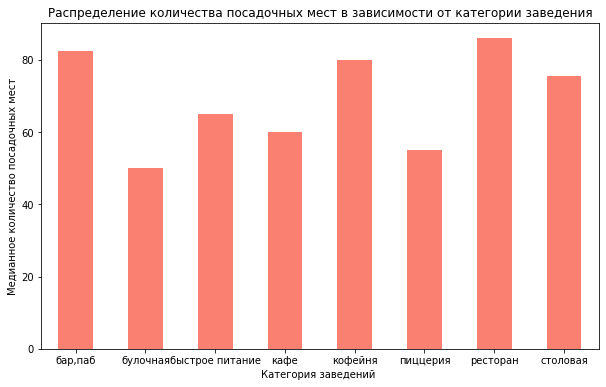

category
булочная           50.0
пиццерия           55.0
кафе               60.0
быстрое питание    65.0
столовая           75.5
кофейня            80.0
бар,паб            82.5
ресторан           86.0
Name: seats, dtype: float32

In [39]:
# Группируем данные
df_group2 = df.groupby('category')['seats'].median()
# Строим столбчатую диаграмму

df_group2.plot(kind='bar',
                title='Распределение количества посадочных мест в зависимости от категории заведения',
                xlabel='Категория заведений ',
                ylabel='Медианное количество посадочных мест',
                rot=0,
                figsize=(10, 6),
               color = ( "salmon"))

# Отображаем график
plt.show()
df_group2.sort_values()

В целом наибольшее количество посадочных мест приходится на рестораны (медиана 86 мест), бары,пабы (82 места) и кофейни (80 мест).
Среднее количество мест приходится на столовые (75 мест), быстрое питание (65) и кафе (60)
В пиццерии и булочной в среднем наименьшее количество посадочных мест (55 и 50 соответственно). 


Пока писала вывод, подумала, что наверно количество посадочных мест зависит от времени, на которое в среднем посетитель занимает место. Но после гугла поняла, что много зависит в целом от квадратуры арендуемого помещения. Для разных типов помещения выделятся разное количество квадратов под посетителя. Плюс существенным является наличие у заведения собственной кухни, которая "съедает" значительную площадь заведения в зависимости от его типа.

В ощем количество посадочных мест складывается из большого количества факторов, чтобы дать рекомендации под количество мест для открытия заведения - лучше пригласить эксперта, чтобы тот наиболее корректно расчитал это количество с инженерной точки зрения, и уже отталкиваясь от типа заведения можно обращаться к статистике и анализу: в заведениях где питаются быстро, возожно потребуется меньшее количество мест, а в заведениях с длительными посиделками стоит либо вводить ограниченное время бронирования, либо увеличивать количество посадочных мест.

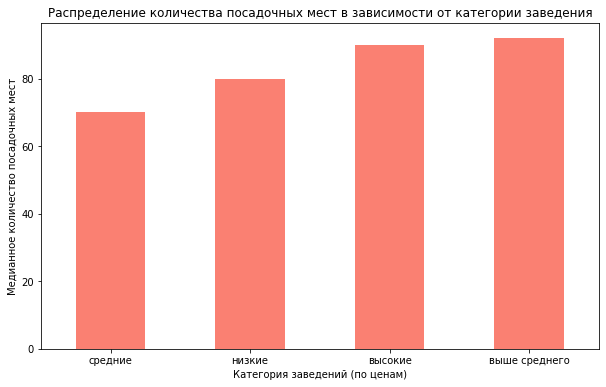

In [40]:
# Группируем данные
df_grouped2 = df.groupby('price')['seats'].median()
# Строим столбчатую диаграмму

df_grouped2.sort_values().plot(kind='bar',
                title='Распределение количества посадочных мест в зависимости от категории заведения',
                xlabel='Категория заведений (по ценам)',
                ylabel='Медианное количество посадочных мест',
                rot=0,
                figsize=(10, 6),
               color = ( "salmon"))

# Отображаем график
plt.show()

In [41]:

pivot_seats=df.pivot_table(values='seats',index=['price'],aggfunc=['median'])
display(pivot_seats)

,median
,seats
price,
высокие,90.0
выше среднего,92.0
низкие,80.0
средние,70.0


Наибольшее количество посадочных мест наблюдается в заведениях с повышенным и высоким прайсом (90 мест и 92), в категории низкого прайса медианное значение количества посадочных мест - 80, в заведениях с средним прайсом обычно наименьшее количество посадочных мест - 70.

<a class='anchor' id="ch3.5"></a>

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

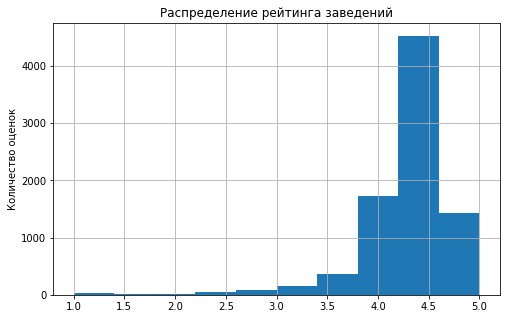

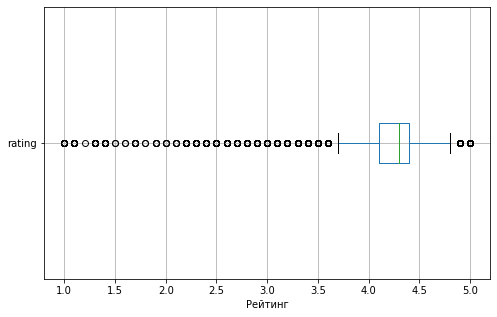

In [42]:
#Строим гистограмму, для выявления выбросов
df['rating'].hist(figsize=(8, 5))
plt.title('Распределение рейтинга заведений') # Заголовок диаграммы
plt.ylabel('Количество оценок') # Подписываем ось Y

plt.xticks(rotation=0)  # Оставляем метки оси X горизонтальными
plt.show()
#Строим диаграмму размаха, для выявления выбросов
boxplot = df.boxplot(column='rating',
                     vert=False, 
                     figsize=(8, 5),grid=True)

# Добавляем заголовок и метку оси X

boxplot.set_xlabel('Рейтинг')

plt.show()


Из графиков видно, что основной разброс значений приходится на диапазон от 4.2 до 4.4. Но в целом, достаточное количество оценок приходится на диапазон от 3.75 до 4.7 - достаточно лояльные оценки. Количество оценок до 3.75 - незначительно.

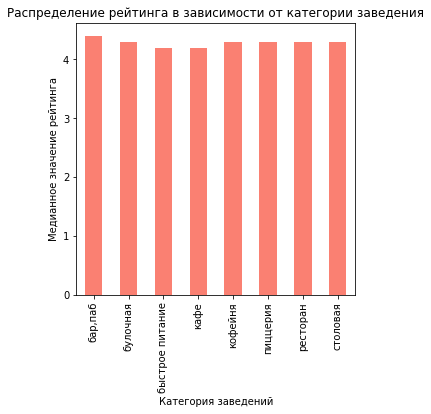

category
быстрое питание    4.2
кафе               4.2
булочная           4.3
кофейня            4.3
пиццерия           4.3
ресторан           4.3
столовая           4.3
бар,паб            4.4
Name: rating, dtype: float32

In [43]:
# Группируем данные
df_grouped4 = df.groupby('category')['rating'].median()
# Строим столбчатую диаграмму

df_grouped4.plot(kind='bar',
                title='Распределение рейтинга в зависимости от категории заведения',
                xlabel='Категория заведений',
                ylabel='Медианное значение рейтинга',
                rot=90,
                figsize=(5, 5),
               color = ( "salmon"))

# Отображаем график
plt.show()

df_grouped4.sort_values()

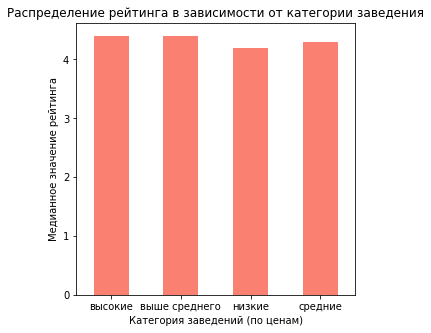

price
низкие           4.2
средние          4.3
высокие          4.4
выше среднего    4.4
Name: rating, dtype: float32

count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [44]:
# Группируем данные
df_grouped3 = df.groupby('price')['rating'].median()
# Строим столбчатую диаграмму

df_grouped3.plot(kind='bar',
                title='Распределение рейтинга в зависимости от категории заведения',
                xlabel='Категория заведений (по ценам)',
                ylabel='Медианное значение рейтинга',
                rot=0,
                figsize=(5, 5),
               color = ( "salmon"))

# Отображаем график
plt.show()
display(df_grouped3.sort_values())
df['rating'].describe() 

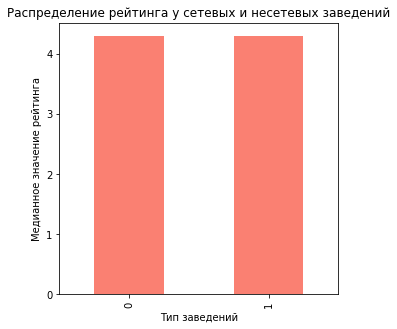

chain
0    4.3
1    4.3
Name: rating, dtype: float32

In [45]:
# Группируем данные
df_grouped5 = df.groupby('chain')['rating'].median()
# Строим столбчатую диаграмму

df_grouped5.plot(kind='bar',
                title='Распределение рейтинга у сетевых и несетевых заведений',
                xlabel='Тип заведений',
                ylabel='Медианное значение рейтинга',
                rot=90,
                figsize=(5, 5),
               color = ( "salmon"))

# Отображаем график
plt.show()

df_grouped5

В основном все представленные заведения имеют высокий рейтинг (4.1-4.4, медиана 4.3) вне зависимости от категории. Рейтинг заведений с низким и средним прайсом (по медиане) незначительно ниже остальных категорий.

<a class='anchor' id="ch3.6"></a>

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['rating', 'chain']
Корреляционная матрица с коэффициентом phi_k:
            rating  category  district     chain     price   is_24_7
rating    1.000000  0.198941  0.189389  0.119417  0.282797  0.182855
category  0.198941  1.000000  0.174474  0.265532  0.600804  0.251390
district  0.189389  0.174474  1.000000  0.064431  0.190397  0.080894
chain     0.119417  0.265532  0.064431  1.000000  0.358594  0.039361
price     0.282797  0.600804  0.190397  0.358594  1.000000  0.026622
is_24_7   0.182855  0.251390  0.080894  0.039361  0.026622  1.000000


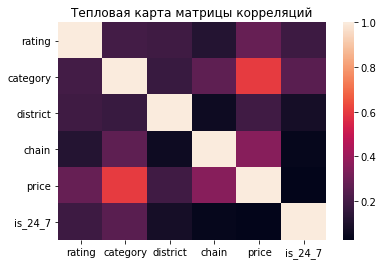

In [46]:

# Выбираем несколько столбцов из датафрейма
corr_columns = ['rating','category','district','chain','price','is_24_7']

# Посчитаем матрицу корреляций
corr_matrix = df[corr_columns].phik_matrix()
print('Корреляционная матрица с коэффициентом phi_k:')
print(corr_matrix) 

# Создаём тепловую  карту
sns.heatmap(corr_matrix)

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций')
plt.show()
    


По корреляционная матрице с коэффициентом phi_k наибольшая корреляция рейтинга заведения наблюдается с прайсом.

Самая сильная связь, исходя из корреляционной матрицы, приходится на корреляцию цены и категории ресторана.

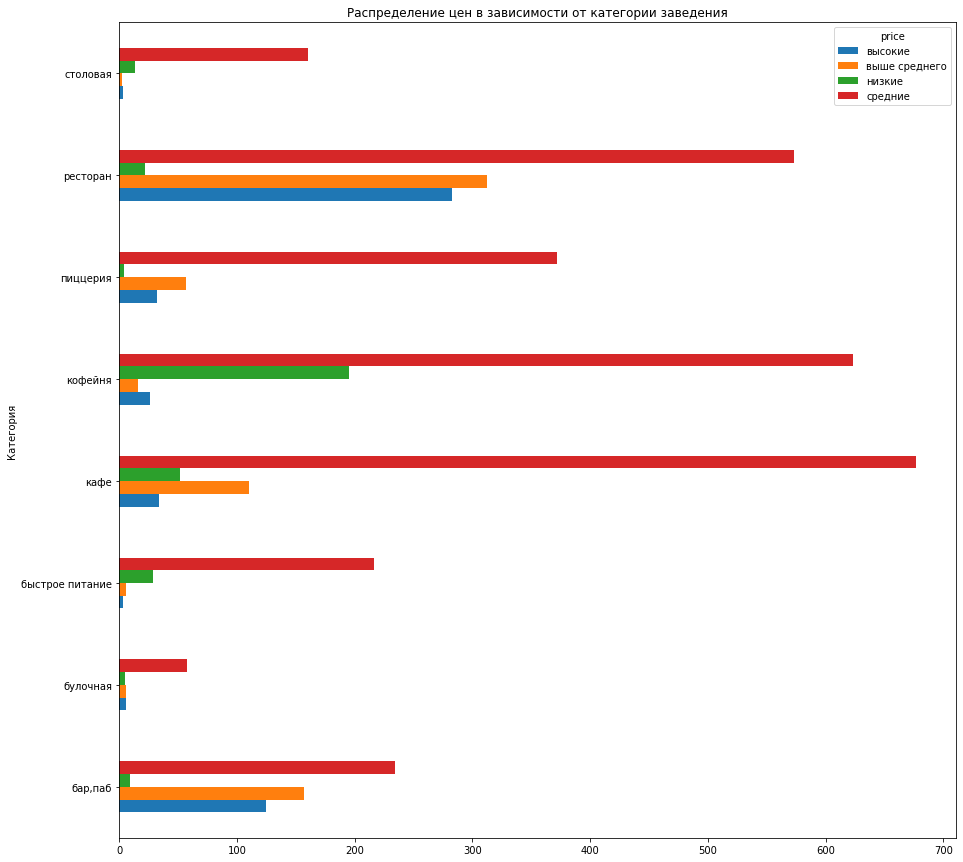

price,высокие,выше среднего,низкие,средние
category,,,,
"бар,паб",125,157,9,234
булочная,6,6,5,58
быстрое питание,3,6,29,216
кафе,34,110,52,677
кофейня,26,16,195,623
пиццерия,32,57,4,372
ресторан,283,312,22,573
столовая,3,2,13,160


In [47]:

df_tmp=df.groupby(['category','price'])['id'].count().unstack(fill_value=0)
df_tmp.plot(kind='barh',
                title='Распределение цен в зависимости от категории заведения',
                xlabel='Категория',
                ylabel='Количество цен определенной категории',
                rot=0,
                figsize=(15, 15)
           )
                
plt.show()
df_tmp               

Честно говоря, я не совсем поняла как проверить связь.
Корреляция конечно наблюдается, по данным видно, что высокий прайс и выше среднего встречается в определеных заведениях чаще (ресторан, кафе, бар), низкие - в кофейнях и т.д. 

<a class='anchor' id="ch3.7"></a>

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

,,rating,count_rest
name,category,,
шоколадница,кофейня,4.2,119
домино'с_пицца,пиццерия,4.2,76
додо_пицца,пиццерия,4.3,74
яндекс_лавка,ресторан,4.0,72
one_price_coffee,кофейня,4.2,71
cofix,кофейня,4.1,65
prime,ресторан,4.2,49
кофепорт,кофейня,4.2,42
кулинарная_лавка_братьев_караваевых,кафе,4.4,39


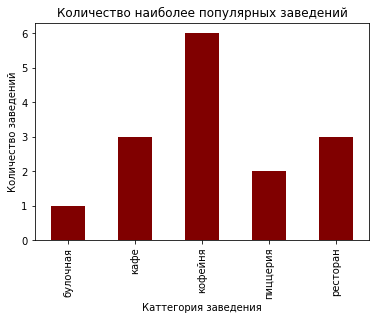

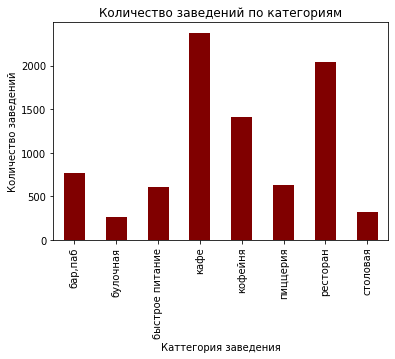

category
булочная            256
столовая            315
быстрое питание     603
пиццерия            633
бар,паб             765
кофейня            1413
ресторан           2041
кафе               2377
Name: id, dtype: int64

In [48]:
df_popular = df.loc[df['chain']==1].groupby(['name','category']).agg({'rating':'median','address':'count'})
df_popular=df_popular.sort_values(by='address', ascending=False).iloc[:15]
df_popular = df_popular.rename(columns = {'address':"count_rest"})
display(df_popular)
df_popular.groupby('category')['count_rest'].count().plot(kind='bar',
                                                          title='Количество наиболее популярных заведений',
                                                          legend=False,
                                                          ylabel='Количество заведений',
                                                          xlabel='Каттегория заведения',
                                                          color =  "maroon")
plt.show()
df.groupby('category')['id'].count().plot(kind='bar',
                                                          title='Количество заведений по категориям',
                                                          legend=False,
                                                          ylabel='Количество заведений',
                                                          xlabel='Каттегория заведения',
                                                          color =  "maroon")

plt.show()
df.groupby('category')['id'].count().sort_values()

Наиболее распрастраненное сетевое заведение Москвы - шоколадница, далее идут две пиццерии - доминос и додо. Рейтинги тройки лидеров приблизительно схожи - 4.2, 4.3. В целом у заведений входящих в топ-15 по распространенности рейтинг колеблется в диапазоне от 4 до 4.4

Если рассматривать в разврезе топ 15 по распрастраненности сетей:
Наиболее распространенные заведения обычно являются кофейнями, реже - кафе и рестраном. Пиццерии и булочные по количеству сетевых заведений несколько отстают.

Если рассматривать весь датафрейм:
То самым распрастраненным заведением является кафе, далее ресторан и кофейня.

In [49]:

df_popular_rating = df.groupby(['name','category']).agg({'rating':'max','address':'count'})
df_popular_rating=df_popular_rating.sort_values(by=['address'], ascending=False)

display(df_popular_rating[df_popular_rating['rating']==5])

,,rating,address
name,category,,
wild_bean_cafe,кофейня,5.0,8
батони,ресторан,5.0,7
zамания,пиццерия,5.0,6
хинкали-gали!,кафе,5.0,5
чайная,кафе,5.0,4
...,...,...,...
бансонс_бургер_китчен,ресторан,5.0,1
бар_б_к'ю_окс,быстрое питание,5.0,1
бабл_дабл,кофейня,5.0,1


In [50]:
len(df)

8403

Самый высокий рейтинг встречается у 104 заведений (всего 8403). Из них самое распространенное - wild_bean_cafe (8 заведений)

In [51]:

df_popular_rating = df.groupby(['name','category']).agg({'rating':'median','address':'count'})
df_popular_rating=df_popular_rating.sort_values(by=['address'], ascending=False)

display(df_popular_rating[df_popular_rating['rating']==5])

,,rating,address
name,category,,
напитки_со_всего_мира,кофейня,5.0,1
мята_cyber,ресторан,5.0,1
мясная_машина,кафе,5.0,1
мужик_у_плиты,"бар,паб",5.0,1
мята_signature_алтуфьево,кафе,5.0,1
"пироги_по-домашнему,_халяль",быстрое питание,5.0,1
подоконник,кофейня,5.0,1
офис-буфет,столовая,5.0,1
кофейная_история,кофейня,5.0,1


Примечательно, что у сети не может быть максимального рейтинга по медиане рейтингов всех ресторанов.

<a class='anchor' id="ch3.8"></a>

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.

district
Юго-Восточный административный округ        450.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Восточный административный округ            575.0
Юго-Западный административный округ         600.0
Северный административный округ             650.0
Северо-Западный административный округ      700.0
Западный административный округ            1000.0
Центральный административный округ         1000.0
Name: middle_avg_bill, dtype: float32

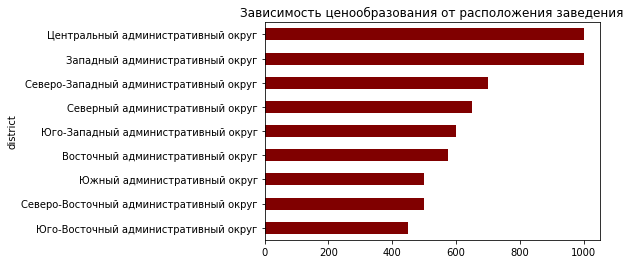

In [52]:
display(df.groupby('district')['middle_avg_bill'].median().sort_values())
df.groupby('district')['middle_avg_bill'].median().sort_values().plot(kind='barh',
                                                        title='Зависимость ценообразования от расположения заведения',
                                                        legend=False,
                                                        ylabel='Средний чек',
                                                        color =  "maroon")
plt.show()

- Наиболее дорогие цены наблюдаются в заведениях расположенных в Центральном и Западном АО (до 1000). 
- Второе место по дороговизне занимают Северо-западный и Северный АО (до 700). 
- Третье мето делят - Юго-западный и Восточный АО (до 600). 
- Наиболее бюджетные заведения обычно расположены в Южном, Юго-восточном и Северо-восточном АО (до 500р).
*в скобках указан средний чек

<a class='anchor' id="ch3.9"></a>

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


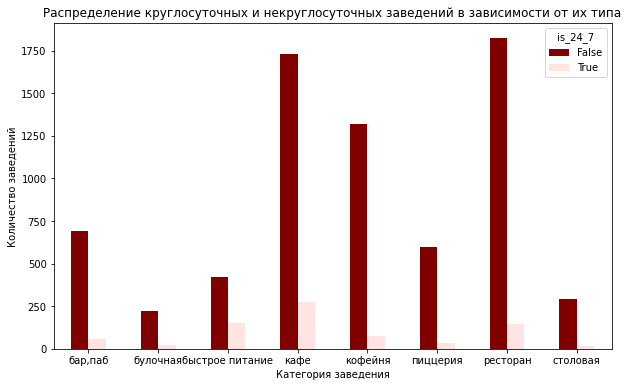

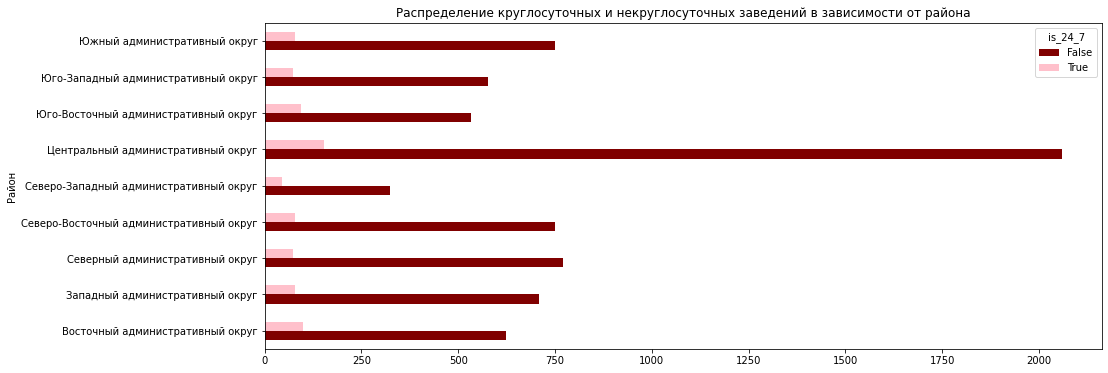

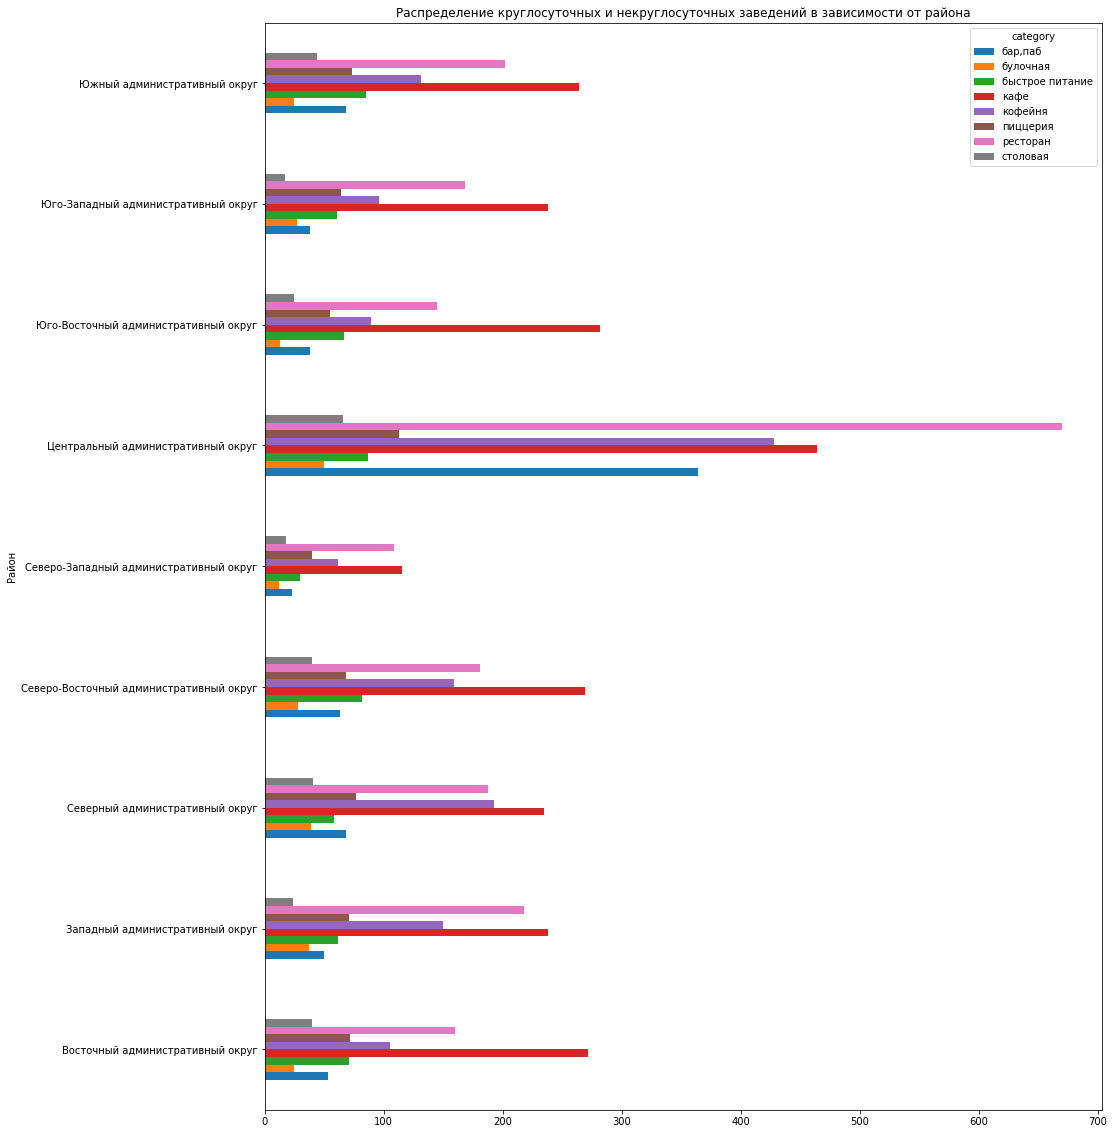

In [53]:
#### Группируем данные
df_hours_type = df.groupby(['category','is_24_7'])['id'].count().unstack(fill_value=0)
df_hours_dist = df.groupby(['district','is_24_7'])['id'].count().unstack(fill_value=0)
df_dist_cat = df.groupby(['district','category'])['id'].count().unstack(fill_value=0)

# Строим столбчатую диаграмму

ax=df_hours_type.plot(kind='bar',
                title='Распределение круглосуточных и некруглосуточных заведений в зависимости от их типа',
                xlabel='Категория заведения',
                ylabel='Количество заведений',
                rot=0,
                figsize=(10, 6),
               color = ('maroon', "mistyrose"))
ax2=df_hours_dist.plot(kind='barh',
                title='Распределение круглосуточных и некруглосуточных заведений в зависимости от района',
                xlabel='Район',
                ylabel='Количество заведений',
                rot=0,
                figsize=(15, 6),
                color = ('maroon', "pink"))
ax3=df_dist_cat.plot(kind='barh',
                title='Распределение круглосуточных и некруглосуточных заведений в зависимости от района',
                xlabel='Район',
                ylabel='Количество заведений',
                rot=0,
                figsize=(15, 20))

# Отображаем график
plt.show()

#pivot_chain_price=df.pivot_table(values='id',index=['chain','price'],aggfunc=['count'])
#display(pivot_chain_price)

Некруглосуточных заведений -подавляющее большинство. Наибольшее количество круглосуточных заведений относятся к ресторанам и кафе. В основном круглосуточные заведения расположены в Центральном АО, но он в целом отличается концентрацией заведений. Если рассматривать относительное значение круглосуточный и некруглосуточных заведений, то Юго-восточный АО отличиется повышенной концентрацией круглосуточных заведений.
Пактически во всех районах преобладают заведения типа "кафе","ресторан" и "кофейня". В центральном АО достаточно популярны пабы и бары.

<a class='anchor' id="ch3.10"></a>

### Промежуточный вывод

    Наиболее распространенные категории заведений (по распространенности) - кафе, ресторан, кофейня. -они лидеры по количеству заведений практически в каждом районе. Исключением является Центральный район (наиболее насыщенный на различные заведения), где в лидеры выбились бары и пабы.
    
    В основном распространены заведения со средним прайсом, наименее - с низким. Зачастую у заведений с высоким прайсом выше рейтинг, а у заведений с низким - чаще рейтинг ниже, чем в остальных ценовых категориях. Кстати и количество посадочны мест выше зачасатую у заведений с высоким рейтингом.  Обычно в заведениях от 40 до 140 посадочных мест (медиана 75), но в заведениях с высоким и прайсом выше среднего обычно - 90, 92 соответственно.
    В целом наибольшее количество посадочных мест приходится на рестораны (медиана 86 мест), бары,пабы (82 места) и кофейни (80 мест). Среднее количество мест приходится на столовые (75 мест), быстрое питание (65) и кафе (60). В пиццерии и булочной в среднем наименьшее количество посадочных мест (55 и 50 соответственно). 
    
    В общем количество посадочных мест складывается из большого количества факторов, чтобы дать рекомендации под количество мест для открытия заведения - лучше пригласить эксперта, чтобы тот наиболее корректно расчитал это количество с инженерной точки зрения, и уже отталкиваясь от типа заведения можно обращаться к статистике и анализу: в заведениях где питаются быстро, возожно потребуется меньшее количество мест, а в заведениях с длительными посиделками стоит либо вводить ограниченное время бронирования, либо увеличивать количество посадочных мест.
    
    Несетевые заведения встречаются чаще. Вне зависимости от типа заведений наиболее часто встречающийся тип -кафе.  Рейтинг не зависит от типа заведения, медианное значения в обоих категориях - 4.3.
    Статистика по сетевым завадениям:
    - Чаще всего сетевыми являются кафе (779), но всего 33% от всех кафе сетевые.
    - Далее идут ресторан (730) и кофейня (720), если рассматривать в разрезе категорий, то 36% ресторанов и 51% кофеен - сетевые.
    - Интересно, что наибольший процент сетевых заведений (61%) приходится на булочные, или 157 сетевых заведений. Похожая картина наблюдается с пиццериями (52%) или 330 сетевых заведений.
    
    Самый высокий рейтинг встречается у 104 заведений (всего 8403). Из них самое распространенное - wild_bean_cafe (8 заведений). Примечательно, что сетевых заведений с медианным рейтингом 5 - нет. Скорее всего, достаточно трудно следить и поддерживать высокий уровень у каждого заведения, входящего в сеть.
     
    В зависимости от района расположения заведения достаточно сильно зависит средний чек, наиблее высокие цены наблюдаются в Центральном и Западном АО, самый низкий чек в Юго-восточном АО.
    
    Нименьшее количество заведений в Северо-запакдном АО, наибольшее в Центральном (ЦАО).
    Если рассматривать заведения в разрезе ЦАО, то видно, что наиболее распространенными являются рестораны (670), на втором месте: кафе (464), кофейня (428) и бар,паб (364). Наименее распространенные заведения: пиццерия (113),быстрое питание (87),столовая (66), булочная (50).
    Возможно, это связано с тем, что центр - является местом, где посетители хотят встретиться с друзьями и затратить несколько больше времени на трапезу и насладится красивыми видами, нежели это обычно делается в заведениях типа пиццерии, быстрого питания, столовой или булочной. Такие заведения, будто больше подходят под спальные или промышленные районы, чтобы чем то по-быстрому закинуться или купить что-то домой.
    
    Некруглосуточных заведений -подавляющее большинство. Наибольшее количество круглосуточных заведений относятся к ресторанам и кафе. В основном круглосуточные заведения расположены в Центральном АО, который в целом отличается концентрацией заведений. Если рассматривать относительное значение круглосуточных и некруглосуточных заведений, то Юго-восточный АО отличается повышенной концентрацией круглосуточных заведений.


---
<a class='anchor' id="ch4"></a>
##  Детальное исследование пиццерий

Проведите более детальное исследование заведений типа «пиццерия». Ответьте на следующие вопросы:


Попробуйте дать рекомендацию для открытия нового заведения. Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано. Например, можно сделать акцент на районах или улицах. Или дать характеристику типичной пиццерии.

In [54]:
df['pizza']=df['category'].str.contains(''.join('пиццерия')) #фильтр
pizza = df.loc[df['pizza']==True]
display(pizza)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7,pizza
4,a163aada139c4c7f87b0b1c0b466a50f,иль_марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False,True
5,8a343546b24e4a499ad96eb7d0797a8a,sergio_pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN,False,True
26,1b831beddbde4c58bc8f6b7fa2c269c2,пикочино,пиццерия,"Москва, Дмитровское шоссе, 107к2",Северный административный округ,"пн-чт 11:00–22:00; пт,сб 11:00–23:00; вс 11:00...",4.5,0,NaN,средние,Средний счёт:300–1500 ₽,900.0,NaN,False,True
32,4e5314c970cc47c58e5d24ee3ee70fa9,додо_пицца,пиццерия,"Москва, Коровинское шоссе, 23, корп. 1",Северный административный округ,"ежедневно, 09:00–23:00",4.3,1,46.0,средние,Средний счёт:328 ₽,328.0,NaN,False,True
34,629ac86faa0b4ca49eda1ee27cbda5bb,домино'с_пицца,пиццерия,"Москва, Клязьминская улица, 11, корп. 4",Северный административный округ,"ежедневно, 10:00–23:00",4.2,1,247.0,средние,Средний счёт:от 500 ₽,500.0,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,b532eeec907a44179ef6cb6d0638166d,буфалино,пиццерия,"Москва, Новоухтомское шоссе, 2А",Восточный административный округ,"ежедневно, 10:00–22:00",4.4,0,NaN,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,False,True
8351,92660e53e38f4744b83aeec3addcfa7f,mr__john’s,пиццерия,"Москва, 2-й Грайвороновский проезд, 42к4",Юго-Восточный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.5,0,NaN,средние,Средний счёт:390–1000 ₽,695.0,NaN,False,True
8366,119c3237f9ac45c789debbc0f377784d,ситипицца,пиццерия,"Москва, Ферганская улица, 12",Юго-Восточный административный округ,"ежедневно, 10:00–23:00",4.2,0,4.0,NaN,Средний счёт:300–700 ₽,500.0,NaN,False,True
8383,3abfb264a4a6489e84167880bad5f109,pizza24/7,пиццерия,"Москва, улица Юных Ленинцев, 10/15к1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,NaN,NaN,Средний счёт:150 ₽,150.0,NaN,True,True


<a class='anchor' id="ch4.1"></a>

### Задача 1

Сколько всего пиццерий в датасете? В каких районах их больше всего? Вычислите долю пиццерий в каждом районе от общего количества заведений. Результат сопроводите подходящими визуализациями.

district
Центральный административный округ          5.307656
Северо-Восточный административный округ     8.272506
Юго-Восточный административный округ        8.345979
Южный административный округ                8.913309
Западный административный округ             9.114249
Северный административный округ             9.367397
Восточный административный округ            9.917355
Юго-Западный административный округ         9.922481
Северо-Западный административный округ     10.840108
Name: id, dtype: float64

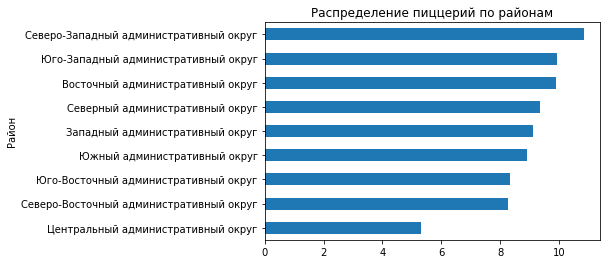

In [55]:
df_true_pizza = df.loc[df['pizza']==True].groupby('district')['id'].count()

df_false_pizza = df.loc[df['pizza']==False].groupby('district')['id'].count()

part_pizza=df_true_pizza/df_false_pizza*100
display(part_pizza.sort_values())
part_pizza.sort_values().plot(kind='barh',
                title='Распределение пиццерий по районам',
                ylabel='Доля пиццерий от общего количества заведений, %',
                xlabel='Район')
# Строим столбчатую диаграмму

plt.show()

На Северо-западный АО приходится большее количество пиццерий (относительно), чем в остальны районах (более 10%). Но в этом округе в целом не особо много заведений. 

На Юго-западный и Восточный АО прикодится около 10% пиццерий относительно остальных заведений. 

Наименьшую долю занимают пиццерии в Центральном АО, несмотря на то, что в нем сконцентрирован основной объем заведений. Видимо пиццерии не особо пользуются спросом в этом районе.

<a class='anchor' id="ch4.2"></a>

### Задача 2

Дайте характеристику типовой пиццерии: сколько в ней посадочных мест, какой средний чек или стоимость чашки кофе, какой средний рейтинг? Какая доля сетевых и круглосуточных заведений? Результат сопроводите подходящими визуализациями.

In [56]:

print(pizza.describe())
print('')
print(f' Общее число пиццерий: {pizza.shape[0]}')
print(' Процент сетевых  пиццерий:')
print(pizza['chain'].sum()/pizza.shape[0]*100)
print(' Процент круглосуточных пиццерий:')
print(pizza['is_24_7'].sum()/pizza.shape[0]*100)


           rating       chain        seats  middle_avg_bill  middle_coffee_cup
count  633.000000  633.000000   427.000000       395.000000           3.000000
mean     4.301264    0.521327    94.496490       789.377197         153.333328
std      0.336162    0.499940   112.282707       518.310730           5.773502
min      1.000000    0.000000     0.000000       150.000000         150.000000
25%      4.200000    0.000000    30.000000       424.000000         150.000000
50%      4.300000    1.000000    55.000000       600.000000         150.000000
75%      4.400000    1.000000   120.000000      1000.000000         155.000000
max      5.000000    1.000000  1288.000000      3000.000000         160.000000

 Общее число пиццерий: 633
 Процент сетевых  пиццерий:
52.13270142180095
 Процент круглосуточных пиццерий:
5.055292259083728


Общее число пиццерий 633, из них 52,13% - сетевые. 5% от всех пиццерий круглосуточные.

Средний рейтинг для пиццерии 4.3. Количество мест в пиццерии обычно - 55, но встречаются и выскоки от 120 до 1288 мест. Обычно средний чек в пиццерии составляет 600 рублей, а чашка кофе стоит порядка 150 рублей (150-155).

<a class='anchor' id="ch4.3"></a>

### Задача 3

Изучите распределение сетевых и несетевых пиццерий в зависимости от округа Москвы. В каких округах меньше всего сетевых пиццерий? Результат сопроводите подходящими визуализациями.

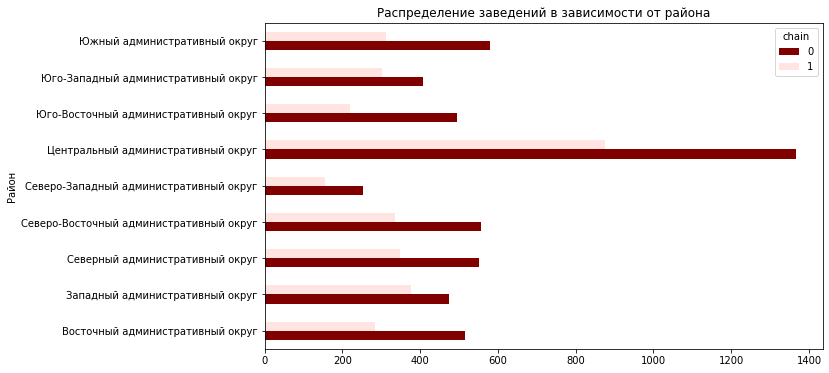

,несетевой,сетевой,all,part_несетевой,part_сетевой
district,,,,,
Западный административный округ,474,376,850,55.764706,44.235294
Юго-Западный административный округ,407,302,709,57.404795,42.595205
Центральный административный округ,1367,875,2242,60.972346,39.027654
Северный административный округ,552,347,899,61.401557,38.598443
Северо-Западный административный округ,253,156,409,61.858191,38.141809
Северо-Восточный административный округ,556,334,890,62.471910,37.528090
Восточный административный округ,515,283,798,64.536341,35.463659
Южный административный округ,580,312,892,65.022422,34.977578
Юго-Восточный административный округ,494,220,714,69.187675,30.812325


In [57]:
#### Группируем данные

pizza_dist = df.groupby(['district','chain'])['id'].count().unstack(fill_value=0)

# Строим столбчатую диаграмму

pizza_dist.plot(kind='barh',
                title='Распределение заведений в зависимости от района',
                xlabel='Район',
                ylabel='Количество заведений',
                rot=0,
                figsize=(10, 6),
               color = ('maroon', "mistyrose"))
                
plt.show()
pizza_dist.columns = [ 'несетевой',"сетевой"]                
pizza_dist['all']=pizza_dist['несетевой']+pizza_dist['сетевой'] 
pizza_dist['part_несетевой']=pizza_dist['несетевой']/pizza_dist['all']*100
pizza_dist['part_сетевой']=pizza_dist['сетевой']/pizza_dist['all']*100
display(pizza_dist.sort_values(by='part_сетевой', ascending=False))

Наибольшее количество сетевых пиццерий расположено в Западном АО (44%), далее идут Юго-западный (43%) и Центральный (39%) АО.

Наименьшее - в Юго-восточном (31%).
В целом, сетевые пиццерии занимают значительную часть, но будто меньшую, чем казалось. Если подумать, навскидку, то будто везде распространены сетевые пиццерии, а несетевых пиццерий сразу так и не упомнишь.

<a class='anchor' id="ch4.4"></a>

### Задача 4

Дополнительно можете изучить другие закономерности, которые покажутся вам интересными и важными.

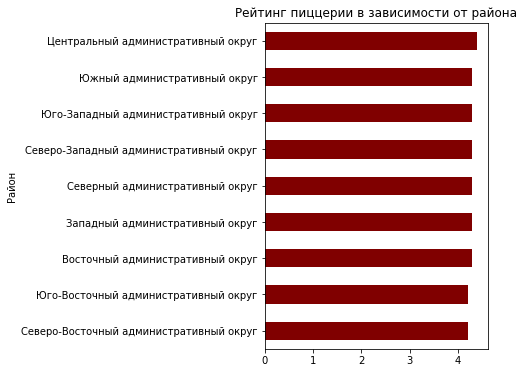

district
Северо-Восточный административный округ    4.2
Юго-Восточный административный округ       4.2
Восточный административный округ           4.3
Западный административный округ            4.3
Северный административный округ            4.3
Северо-Западный административный округ     4.3
Юго-Западный административный округ        4.3
Южный административный округ               4.3
Центральный административный округ         4.4
Name: rating, dtype: float32

In [58]:
#### Группируем данные

pizza_rating = df.groupby('district')['rating'].median().sort_values()


# Строим столбчатую диаграмму

pizza_rating.plot(kind='barh',
                title='Рейтинг пиццерии в зависимости от района',
                xlabel='Район',
                ylabel='Рейтинг',
                rot=0,
                figsize=(4, 6),
               color = ('maroon'))
                
plt.show()
                
                
display(pizza_rating)

In [59]:
df.groupby('district')['id'].count().sort_values()

district
Северо-Западный административный округ      409
Юго-Западный административный округ         709
Юго-Восточный административный округ        714
Восточный административный округ            798
Западный административный округ             850
Северо-Восточный административный округ     890
Южный административный округ                892
Северный административный округ             899
Центральный административный округ         2242
Name: id, dtype: int64

In [60]:
df.groupby('district')['middle_avg_bill'].median().sort_values()

district
Юго-Восточный административный округ        450.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Восточный административный округ            575.0
Юго-Западный административный округ         600.0
Северный административный округ             650.0
Северо-Западный административный округ      700.0
Западный административный округ            1000.0
Центральный административный округ         1000.0
Name: middle_avg_bill, dtype: float32

<a class='anchor' id="ch4.5"></a>

### Промежуточный вывод

Попробуйте дать рекомендацию для открытия нового заведения. Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано. Например, можно сделать акцент на районах или улицах. Или дать характеристику типичной пиццерии.

В целом можно сделать ставку на район с низким рейтингом пиццерий, и попытаться сделать качественную пиццерию с хорошим сервисом, чтобы она выгодно отличалась (Северо-восточный АО, Юго восточный АО). 
Также можно сделать ставку на район в котором не очень много заведений - Северо-западный (409, 10.84, 93.28), Юго-западный(709, 9.92, 111.36, ), ***Юго-восточный (714, 8.3, 117.56),Северо-восточный (890, 8.2, 101.88)***   
*в скобках указано: количество пиццерий, процент пиццерий относительно остальных заведений И площадь округа.

В целом Юго-Восточный и Северо-восточные округа достаточно большие по площади и не сильно насещенные заведениями общественного питания, но нужно обратить, что средний чек в этих районах - наименьший 450 и 500 рублей, это коррелирует с рейтингами заведений. Возможно стоит сделать акцент на маркетинг и раскрутку заведения, но с большим прайсом по району, т.к. если заведение изначально поставит низкий прайс, то при поднятии цен часть аудитории отвалится. Чтобы такого не было стоит делать ставку на эксклюзивность, необычность заведения. 

Судя по стоимости квартир по округам - ЮВ и СВ округа достаточно бюджетные, следовательно можно будет выиграть за счет аренды помещения, с современной обеспеченностью транспортом добраться практически до любой точки для встречи с друзьями - не проблема. Но все же стоит присмотреться к более видовым помещениям, чтобы туда захотелось приехать и было бы чем заняться после тра.

---
<a class='anchor' id="ch5"></a>
##  Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

**Предобработка данных.**

Первоначальные данные были приведены к единому стилю, была проделана работа по выявлению дубликатов и заполнению пропусков. Типы данных были приведены в наиболее экономичный формат. Был выделен столбец для фильтра круглосуточнызх и некруглосуточных заведений.

**Исследовательский анализ данных.**


В работе проведен анализ различных заведений общественного питания Москвы. Данные преимущественно рассматривались в разрезе районов, категорий заведений, а таакже в зависимости от ценовой категории заведения.
В отчете приведены основные статистические характеристики представленных данных, а также выделены ключевые различия.

**Главные выводы и рекомендации**
Наибольшее количество заведений относится к категории кафе (2377), на втором месте - ресторан (2041), на третьем - кофейня (1413).
Остальных заведений значительно меньше:
- бар,паб - 765
- пиццерия - 633
- быстрое питание - 603
Заведения наименее распространенные в Москве:
- столовая - 315
- булочная - 256


Если рассматривать заведения в разрезе районов:
*Центральный АО* - наиболее насыщенный заведениями район (2242). Наиболее популяные категории заведений: 
- ресторан
- кафе
- кофейня
- бар, паб
Наименее популярные:
- булочная
- столовая
- быстрое питание
В этом районе обычно наиболее высокие цены относительно остальных АО (конкурент по ценам - Западный АО), большая часто некруглосуточных ресторанов расположена именно в этом районе. Примечательно, что данный район наименьший по площади - всего 66,18 кв.км. что еще сильнее выделяет его по плотности заведений общественного питание на фоне остальных АО.



В целом категории наиболее популярных заведений практически у всех одинаковые - ресторан, кафе, кофейня. 
В цетральном АО на четвертом месте по распространенности располагаются бары и пабы. В остальных АО на четвертом месте обычно  располагаются пиццерия или быстрое питание.

Наименьшее количество заведений наблюдается в Северо-Западном АО (409), его площадь  93.28 кв.км.

При анализе района под пиццерию было веделено два района: 
- ***Юго-восточный (714, 8.3, 117.56),
- ***Северо-восточный (890, 8.2, 101.88)***   
*в скобках указано: количество пиццерий, процент пиццерий относительно остальных заведений И площадь округа.

Если рассматривать в целом, то на каждый округ приходится следующая доля заведений (без агрегации по категориям):
 * Восточный административный округ          9.496608
 * Западный административный округ          10.115435
 * Северный административный округ          10.698560
 * Северо-Восточный административный округ  10.591455
 * Северо-Западный административный округ    4.867309
 * Центральный административный округ       26.680947
 * Юго-Восточный административный округ      8.496965
 * Юго-Западный административный округ       8.437463
 * Южный административный округ             10.615256
Эти данные подтверждают отсутствие сильной загрузки заведениями общественного питания на Юго-восточный и Северо-восточный АО.

В целом, в этих районах не сильно распространены заведения общественного питания - можно сделать акцент на этом и на эксклюзивности заведения. В питере, например есть заведение Krang-пицца - ставшее популярным за счет своей необычности, заведение подобного типа, думаю стало бы отличным вариантом под открытие нового заведения. 
Делать заведение круглосуточным, думаю, не имеет смысла, данные заведения распространены в центральном районе. Не думаю, что оно будет окупаться за счет ночной работы. Примечательно, что существует корреляция между прайсом и круглосуточностью заведения (коэффициен фи к = 0.35), также устойчивая корреляия наблюдается между прайсом и категорией заведения (0.6). Корреляция цены и рейтинга (0.28)

Изначально стоит открыть несетевое заведение, и все силы пустить на пиар одной локации.
Количество мест сделать медианным по заведению данного типа, в зависимости от того, что хочется открыть ( я бы делала ставки на наиболее популярные категории):
- ресторан (86 мест)
- кафе (60 мест)
- кофейня (80 мест)
- бар, паб/пиццерия (82/55 мест)

Наиболее корректный выбор посадочных мест необходимо делать с детальным изучением законов и СанПин, т.к. во многом количество посадочных мест зависит от площади заведения. А от площади зависит стоимость аренды, этот вопрос лучше детально изучить, а потом уже корректировать количество посадочных мест и решать вопрос с рассадкой посетителей: устанавливать конкретное время бронирования или расширать площадь. 

Цены установить лучше сердние или выше среднего. Возможно стоит рассматривать дополнительно вможность доставки еды. 
Кстати наибольший средний чек обычно в ресторанах или барах,пабах (1250 р.).
А наименьший в столовых (300 р.) и в заведениях быстрого питания (375 р.). В пиццериях и кафе обычно средний чек составляет 600 и 550 рублей соответственно.

